<a href="https://colab.research.google.com/github/sahoopuspanjali/BigData-management-and-processing-2/blob/master/ConvAlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 132kB/s 
     |████████████████████████████████| 3.8MB 40.9MB/s 
     |████████████████████████████████| 450kB 36.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalle

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


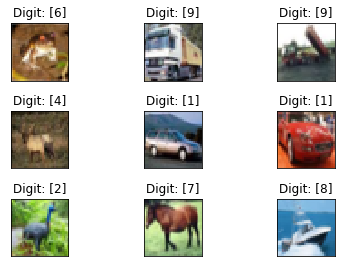

In [0]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title('Digit: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
inputs = keras.Input(shape=(32,32,3))
l1 = keras.layers.Conv2D(filters = 10, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(inputs)
l2 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(l1)
l3 = keras.layers.BatchNormalization()(l2)

l4 = keras.layers.Conv2D(filters = 20, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(l3)
l5 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(l4)
l6 = keras.layers.BatchNormalization()(l5)

l7 = keras.layers.Conv2D(filters = 20, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(l6)
l8 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(l7)
l9 = keras.layers.BatchNormalization()(l8)

l10 = keras.layers.Conv2D(filters = 20, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(l9)
l11 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(l10)
l12 = keras.layers.BatchNormalization()(l11)

l13 = keras.layers.Flatten()(l2)
l14 = keras.layers.Dense(units = 64, activation = 'relu')(l13)
outputs = keras.layers.Dense(units = 10, activation = 'softmax')(l14)

In [0]:
func_model = keras.Model(inputs,outputs)
func_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [0]:
h = func_model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 27s 669us/sample - loss: 3.9446 - accuracy: 0.1001 - val_loss: 2.3025 - val_accuracy: 0.0954
Epoch 2/30
40000/40000 [==============================] - 26s 651us/sample - loss: 2.3022 - accuracy: 0.1006 - val_loss: 2.3044 - val_accuracy: 0.1011
Epoch 3/30
40000/40000 [==============================] - 26s 653us/sample - loss: 2.3021 - accuracy: 0.0983 - val_loss: 2.3024 - val_accuracy: 0.0956
Epoch 4/30
40000/40000 [==============================] - 26s 649us/sample - loss: 2.3033 - accuracy: 0.0988 - val_loss: 2.3020 - val_accuracy: 0.0954
Epoch 5/30
40000/40000 [==============================] - 26s 650us/sample - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3025 - val_accuracy: 0.0977
Epoch 6/30
40000/40000 [==============================] - 26s 655us/sample - loss: 2.3035 - accuracy: 0.1009 - val_loss: 2.3099 - val_accuracy: 0.0977
Epoch 7/30
40000/40000 [====================

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()